# Luca Corsetti 0001131095

The solution must be produced as a Python Notebook.\
The notebook must include appropriate comments and must operate as follows:
1. Read a transactions database in sparse format from a txt file into a list of lists. The file
contains one transaction per line, each line has a variable number of items, separated by a
separator. The external list will have a list for each transaction, each transaction is a list of
items. Show the first two transactions (3 points)
2. Encode the list of lists into a binary representation and transform it into a dataframe whose
columns are the items show the head of that dataframe
3. Find a value of min_support such that the apriori algorithm generates at least 8 frequent
itemsets with at least 2 items. Output the result with the message below (5 points)
4. Find the minimum metric threshold such that at least 10 association rules are extracted
from the frequent itemsets found (5 points)
5. Print the first 10 rules found, sorted by descending confidence and support (3 points)
6. Plot confidence and support for all the sorted rules found (3 points)
7. Scatter plot the rules by confidence and support, labelling the points with the index value of
the corresponding rule (3 points)

Quality of the code (6pt):
1. The python cells must be preceded by appropriate comments
2. Useless cells and pieces of code will be penalised
3. Naming style of variables must be uniform and in English
4. Bad indentation and messy code will be penalised

### 0. Preparation

Before starting out, we will import the necessary libraries & function and we will setup the necessary variables for the notebook

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline

random_state=777

### 1. Read a transactions database in sparse format from a txt file into a list of lists. The file contains one transaction per line, each line has a variable number of items, separated by a separator. The external list will have a list for each transaction, each transaction is a list of items. Show the first two transactions (3 points)

we will start be reading the raw txt files by putting each entry into an array element

In [12]:
f = open('./online_retail_red.txt', mode='r')

transactions = [line.strip('\n').split(';') for line in f.readlines()]

print(f"transaction 1\n {transactions[0]}\n")
print(f"transaction 2\n {transactions[1]}")

transaction 1
 ['CREAM CUPID HEARTS COAT HANGER', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']

transaction 2
 ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK']


### 2. Encode the list of lists into a binary representation and transform it into a dataframe whose columns are the items show the head of that dataframe

to perform the task, we will use the transaction encoder to encode the data into a one-hot format

In [33]:
te = TransactionEncoder()

encoded_transactions = te.fit_transform(transactions)

df = pd.DataFrame(encoded_transaction, columns=te.columns_)
# df.sample(10) # to verify if there are some '1' in the transactions

df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 3. Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below (5 points)

_min_support: 0.xxxx - number of itemsets with at least 2 items: nn_

to find the optimal result, we will iterate until the algorithm finds 8 frequent itemsets with at least 2 items

In [41]:
# requirements
min_itemsets_threshold = 8
min_items_in_itemset_threshold = 2

min_sup = .10 # we will decrement this until the requirements are met
step = -.01

while min_sup > 0:
    print(f"trying support {min_sup:.2f}..")
    frequent_itemsets = apriori(df, min_support=min_sup, use_colnames=True)

    if frequent_itemsets.empty:
        min_sup += step
        continue

    itemsets_above_threshold = sum(frequent_itemsets['itemsets'].apply(lambda x: len(x) >= min_items_in_itemset_threshold))

    if itemsets_above_threshold >= min_itemsets_threshold:
        break

    min_sup += step

if min_sup == 0:
    print(f"no itemset found! try with a bigger range!")
else:
    print(f"met the requirements with min_support={min_sup:.2f}, which produced:\n")
    print(f"- {len(frequent_itemsets)} itemsets")
    print(f"- {itemsets_above_threshold} of which had more than {min_items_in_itemset_threshold} items")

trying support 0.10..
trying support 0.09..
trying support 0.08..
trying support 0.07..
trying support 0.06..
trying support 0.05..
trying support 0.04..
trying support 0.03..
met the requirements with min_support=0.03, which produced:

- 148 itemsets
- 12 of which had more than 2 items


here's the formatted output as requested:

In [43]:
print(f"min_support: {min_sup:.4f} - number of itemsets with at least 2 items: {itemsets_above_threshold}")

min_support: 0.0300 - number of itemsets with at least 2 items: 12


### 4. Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points)

_use “confidence” as metric and output the line below:_\
_Metric: “confidence” - min_metric: 0.xxxx - Number of rules: n_

we can proceed as before, using confidence as metric

In [56]:
# Threshold
min_rules_threshold = 10

min_conf = 1
step = -0.01

while min_conf > 0:
    print(f"trying confidence {min_conf:.2f}..")

    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_conf, num_itemsets=len(frequent_itemsets))
    
    if len(rules) >= min_rules_threshold:
        print(rules)
        break

    min_conf += step

if min_sup == 0:
    print(f"no rule set met the requirements! try again by increasing the range")
else:
    print(f"met the requirements with min_conf={min_conf:.2f}, which produced {len(rules)} rules")

trying confidence 1.00..
trying confidence 0.99..
trying confidence 0.98..
trying confidence 0.97..
trying confidence 0.96..
trying confidence 0.95..
trying confidence 0.94..
trying confidence 0.93..
trying confidence 0.92..
trying confidence 0.91..
trying confidence 0.90..
trying confidence 0.89..
trying confidence 0.88..
trying confidence 0.87..
trying confidence 0.86..
trying confidence 0.85..
trying confidence 0.84..
trying confidence 0.83..
trying confidence 0.82..
trying confidence 0.81..
trying confidence 0.80..
trying confidence 0.79..
trying confidence 0.78..
trying confidence 0.77..
trying confidence 0.76..
trying confidence 0.75..
trying confidence 0.74..
trying confidence 0.73..
trying confidence 0.72..
trying confidence 0.71..
trying confidence 0.70..
trying confidence 0.69..
trying confidence 0.68..
trying confidence 0.67..
trying confidence 0.66..
trying confidence 0.65..
trying confidence 0.64..
trying confidence 0.63..
trying confidence 0.62..
trying confidence 0.61..


In [53]:
print(f"Metric: “confidence” - min_metric: {min_conf:.4f} - Number of rules: {len(rules)}")

Metric: “confidence” - min_metric: 0.6100 - Number of rules: 11


### 5. Print the first 10 rules found, sorted by descending confidence and support (3 points)

we can just sort the found rules by 'confidence' and 'support' using the utility functions available. we will also reset the index to remap the correct order by the new sorted values

In [67]:
sorted_rules = rules.sort_values(by=['confidence', 'support'], ascending=False).reset_index(drop=True)

sorted_rules[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039331,0.052255,0.032282,0.820768,15.707077,1.0,0.030226,5.287817,0.974669,0.544340,0.810886,0.719271
1,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039331,0.053541,0.030547,0.776671,14.505982,1.0,0.028441,4.237964,0.969182,0.490126,0.764038,0.673602
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.052255,0.053541,0.039219,0.750535,14.017835,1.0,0.036421,3.793958,0.979865,0.589076,0.736423,0.741516
3,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053541,0.052255,0.039219,0.732497,14.017835,1.0,0.036421,3.542939,0.981197,0.589076,0.717748,0.741516
4,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041960,0.050241,0.030267,0.721333,14.357586,1.0,0.028159,3.408228,0.971098,0.488708,0.706592,0.661892
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064843,0.108426,0.043919,0.677308,6.246751,1.0,0.036888,2.762927,0.898156,0.339533,0.638065,0.541182
6,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044758,0.062941,0.030100,0.672500,10.684680,1.0,0.027283,2.861250,0.948878,0.387888,0.650502,0.575361
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049010,0.052031,0.031498,0.642694,12.352165,1.0,0.028948,2.653102,0.966406,0.452936,0.623083,0.624035
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050912,0.108426,0.031890,0.626374,5.776988,1.0,0.026370,2.386273,0.871257,0.250219,0.580936,0.460246
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052255,0.039331,0.032282,0.617773,15.707077,1.0,0.030226,2.513347,0.987960,0.544340,0.602124,0.719271


### 6. Plot confidence and support for all the sorted rules found (3 points)

<Axes: title={'center': 'association rules'}>

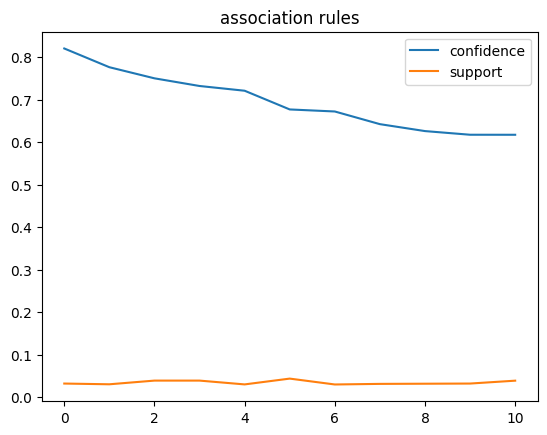

In [81]:
sorted_rules[['confidence', 'support']].plot(title="association rules")

### 7. Scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule (3 points)

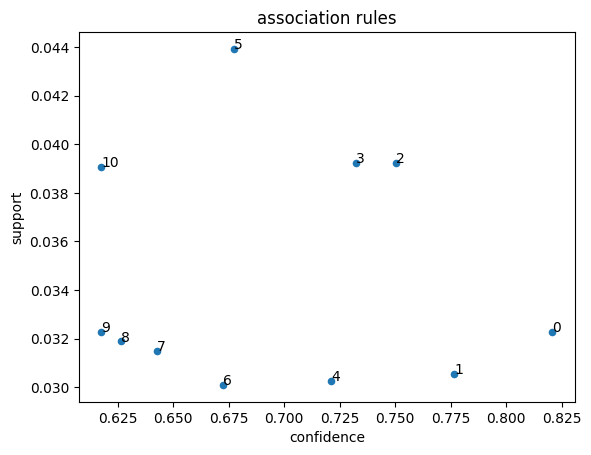

In [88]:
fig = sorted_rules.plot.scatter(x='confidence', y='support', title='association rules')

for i in range(len(sorted_rules)):
    fig.annotate(text=i, xy=(sorted_rules['confidence'][i], sorted_rules['support'][i]))